<a href="https://colab.research.google.com/github/TheKoray18/Term-Deposit-Classification/blob/main/Term_Deposit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount('/content/drive/')

Mounted at /content/drive/


- Veri Setimizi Çağırıyoruz

In [ ]:
import pandas as pd 

data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/term-deposit-marketing-2020.csv')

- Datamızın ilk 5 satırına bakıyoruz


In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


- Datamızın bilgilerine bakıyoruz

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


- Datamızda ki integer değerlere sahip olan sütunların;
  - Count = Satır Sayısı
  - Mean = Ortalaması
  - std = Standart Sapması
  - min = Minimum Değer
  - max = Maximum Değer 
  - %25,%50 ve %75 değerlerini gösterir

In [ ]:
data.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


- Datamızın String değerlere sahip olan sütunların;
  - count = Satır Sayısı
  - unique = Kaç farklı kategoriye sahip olduğu
  - top = O sütunda en çok kullanılan kategori
  - reg = O sütunda en çok kullanılan kategorinin sütunda bulunma sıklığı

In [ ]:
data.describe(include=['object'])

,job,marital,education,default,housing,loan,contact,month,y
count,40000,40000,40000,40000,40000,40000,40000,40000,40000
unique,12,3,4,2,2,2,3,11,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,no
freq,9383,24386,20993,39191,24031,33070,24914,13532,37104


- Data setimizde NaN değerler olup olmadığını kontrol edelim

In [ ]:
data.isnull()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
39996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
39997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
39998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
y            False
dtype: bool

In [ ]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

#Veri Önişleme

- Verimizde NaN değerlerimiz yok. Ama verimizi incelediğimiz de bazı sütunlarımızda " unknown " değerler olduğunu görüyoruz.
- Bu değerler de aslında bir missing value değerdir
- O yüzden bu unknown değerleri düzeltmemiz gerekiyor


- İlk olarak " education " sütunumuzu datamızdan alıyoruz

In [ ]:
education = data.iloc[:,3:4]

In [ ]:
education

,education
0,tertiary
1,secondary
2,secondary
3,unknown
4,unknown
...,...
39995,tertiary
39996,tertiary
39997,secondary
39998,tertiary


- education sütununa bakıyoruz 
- count = NaN olmayan değer sayısıdır.40000 olduğu için datamızda da 40000 sütun olduğu için NaN değerimiz yok
- top = education sütunumuzda secondary sütunda en çok kullanılan kategoridir
- freg = secondary kategorisinin sütunda bulunma sayısıdır


In [ ]:
data['education'].describe()

count         40000
unique            4
top       secondary
freq          20993
Name: education, dtype: object

- Bizim education sütunumuz da unknow adında eksik veri kategorisi bulunmakta
- Biz bunun sütunda bulunma sayısını value_counts() ile öğreniyruz.
- Aşağıda görmüş olduğunuz gibi education sütunun tüm kategorileri için sütunda bulunma sayılarını yazdırdı bize
- unknown sayısının değerinin 1531 olduğunu görüyoruz 

In [ ]:
data["education"].value_counts()

secondary    20993
tertiary     11206
primary       6270
unknown       1531
Name: education, dtype: int64

- Şimdi biz bu unknown kategorisinin yerini doldurmalıyız
- İlk olarak " unknown " kategorisini "NaN" olarak değiştireceğiz.
- Bunu yapmamızın sebebi ise Sımple Imputer kullanırken missing_values parametresine nan yazabilmemiz için.

In [ ]:
import numpy as np

education = education.replace('unknown',np.nan)

In [ ]:
education

,education
0,tertiary
1,secondary
2,secondary
3,NaN
4,NaN
...,...
39995,tertiary
39996,tertiary
39997,secondary
39998,tertiary


- Yukarıda gördüğümüz gibi unknow kategorisinin NaN olarak değiştirdik

- Şimdi sklearn içerisinden SimpleImputer ile NaN olan kategorimize değerler atayacağız.
- unknown kategorisi yani NaN yerine SimpleImputer içinde strategy parametresine 'most_frequent'diyerek education sütununda en çok kullanılan kategoriyi atıyoruz.
- Daha önceden görmüştük education sütunun da en çok kullanılan kategori secondary idi.Yani NaN kategorisini secondary ile değiştirmiş olacağız

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

education = imputer.fit_transform(education)

- Daha önceden index olarak görebildiğimiz 3. ve 4. satırlarımız unknown kategorisine sahipti.

- SimpleImputer ile o kategorileri secondary ile değiştirmiştik.Şimdi onun kontrolünü yapalım.
- for döngüsü ile ilk 10 satıra bakıyoruz.
- 3 ve 4. indexlerde 'secondary' kategorisini göreceğiz.

In [ ]:
for i in range(10):
  print(education[i])

['tertiary']
['secondary']
['secondary']
['secondary']
['secondary']
['tertiary']
['tertiary']
['tertiary']
['primary']
['secondary']


- np.unique ile education sütununda kaç tane kategori bulunduğuna bakacağız.

- unknown kategorisini secondary ile değiştirdiğimizden toplam 3 kategori olması gerekiyor

In [ ]:
np.unique(education)

array(['primary', 'secondary', 'tertiary'], dtype=object)

- Unknown missing value'ye sahip job sütununa bakıyoruz

In [ ]:
data['job'].describe()

count           40000
unique             12
top       blue-collar
freq             9383
Name: job, dtype: object

- 12 farklı kategoriye sahip ve bunlardan biri de unknown kategorisi
- Aşağıda göreceğiniz gibi 235 tane unknown missing valuelarımız var bizim

In [ ]:
data['job'].value_counts()

blue-collar      9383
management       8166
technician       6852
admin            4483
services         3910
retired          1437
self-employed    1414
entrepreneur     1405
unemployed       1104
housemaid        1087
student           524
unknown           235
Name: job, dtype: int64

- job sütununuzu datamızdan alıyoruz

In [ ]:
job = data.iloc[:,1:2]

In [ ]:
job

,job
0,management
1,technician
2,entrepreneur
3,blue-collar
4,unknown
...,...
39995,technician
39996,management
39997,admin
39998,management


- job sütunumuzda ki unknown değerleri np.nan ile NaN değere dönüştüreceğiz

In [ ]:
job = job.replace('unknown',np.nan)

- Aşağıda gördüğünüz gibi unknown değerler NaN olmuş durumda

In [ ]:
job

,job
0,management
1,technician
2,entrepreneur
3,blue-collar
4,NaN
...,...
39995,technician
39996,management
39997,admin
39998,management


- Şimdi bu NaN değerleri imputer ile job sütununda en çok kullanılan kategoriye eşitleyeceğiz

In [ ]:
job = imputer.fit_transform(job)

In [ ]:
job

array([['management'],
       ['technician'],
       ['entrepreneur'],
       ...,
       ['admin'],
       ['management'],
       ['technician']], dtype=object)

- 4. satırımızda unknown değerimiz vardı.Biz bunu NaN yapmıstık.For döngüsü ile ilk 10 satıra baktık.4.satıra baktığımız da blue-color değeri var.

In [ ]:
for i in range(10):
  print(job[i])

['management']
['technician']
['entrepreneur']
['blue-collar']
['blue-collar']
['management']
['management']
['entrepreneur']
['retired']
['technician']


- Aşağıda gördüğümüz gibi job sütununda unknown kategorisi bulunmamakta

In [ ]:
np.unique(job)

array(['admin', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed'], dtype=object)

- Diğer unknown değere sahip olan contact sütunumuzun kaç tane unknown değeri olduğuna bakıyoruz
- 12765 tane unknown değeri olduğunu aşağıda görüyoruz
- Biz bu unknown değeri düzeltmemiz gerekiyor

In [ ]:
data['contact'].value_counts()

cellular     24914
unknown      12765
telephone     2321
Name: contact, dtype: int64

- İlk olarak contact sütunumuzu datamızdan alıyoruz

In [ ]:
contact = data.iloc[:,8:9]

- Aşağıda contact sütunumuzda unknown değerlerimizi görüyoruz.

In [ ]:
contact

,contact
0,unknown
1,unknown
2,unknown
3,unknown
4,unknown
...,...
39995,cellular
39996,cellular
39997,cellular
39998,cellular


- Unknown Değerlerimizi np.nan ile NaN yapıyoruz

In [ ]:
contact = contact.replace('unknown',np.nan)

- unknown değerlerimiz NaN olmuş durumda

In [ ]:
contact

,contact
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
39995,cellular
39996,cellular
39997,cellular
39998,cellular


- SimpleImputer ile NaN değerlerimizi sütunda en çok kullanılan değer yapıyoruz.
- En çok kullanılan kategori cellular'dı
- Bizim de NaN değerlerimiz cellular olacak

In [ ]:
contact = imputer.fit_transform(contact)

- Aşağıda gördüğümüz gibi NaN değerlerimiz cellular olmuş durumda

In [ ]:
contact

array([['cellular'],
       ['cellular'],
       ['cellular'],
       ...,
       ['cellular'],
       ['cellular'],
       ['cellular']], dtype=object)

- Contact sütununda ki kategorilere bakıyoruz.Unknown kategorisinin olmadığını görüyoruz

In [ ]:
np.unique(contact)

array(['cellular', 'telephone'], dtype=object)

- unknown değerleri düzelltiğimiz sütunlarımızı datamızdan siliyoruz

In [ ]:
data = data.drop(['job','education','contact'],axis=1)

- 14 sütunumuz vardı.Şimdi 11 sütunumuz olmuş durumda.
- 3 sütunumuzu silmiştik

In [ ]:
data.shape

(40000, 11)

- Datamızdan job,education ve contact sütunlarını silmiştik.Bizim sildiğimiz sütunlarımız unknown değerleri olan sütunlardı
- Şimdi ise biz unknown değerlerini düzelttiğimiz sütunlarımızı datamıza ekleyeceğiz
- Ama ilk önce datamıza ekleyebilmemiz için array olan bu sütunlarımızı DataFrame yapmamız gerekiyor

- data = DataFrame yapacağımız array olan sütunumuzu yazıyoruz

- index = Bizim datamız da 40000 satırımız var.Bu yüzden oluşturacağımız dataFramede de 40000 satır olması lazım

- columns = datamızda ki olmasını istediğimiz column adını yazıyoruz

In [ ]:
job = pd.DataFrame(data=job,index=range(40000),columns=['job'])

education = pd.DataFrame(data=education,index=range(40000),columns=['education'])

contact = pd.DataFrame(data=contact,index=range(40000),columns=['contact'])

- Aşağıda gördüğümüz gibi numpy.array olan sütunlarımızı pandas.DataFrame yapmış durumdayız

In [ ]:
print(type(job))

print(type(education))

print(type(contact))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


- DataFrame yaptığımız bu sütunlarımızı şimdi datamıza ekleyeceğiz
- ilk olarak job ve education dataFramelerimizi birleştirip data_1 atında yeni bir dataframe elde ediyoruz
- axis=1 dedik çünkü sütun bazlı birleştirme işlemi yapıyoruz

In [ ]:
data_1 = pd.concat([job,education],axis=1)

- Aşağıda gördüğümüz gibi job ve education dataframeleri birleştirerek bir data_1 elde ettik

In [ ]:
data_1

,job,education
0,management,tertiary
1,technician,secondary
2,entrepreneur,secondary
3,blue-collar,secondary
4,blue-collar,secondary
...,...,...
39995,technician,tertiary
39996,management,tertiary
39997,admin,secondary
39998,management,tertiary


- Şimdi ise data_1 ile contact dataFramemizi birleştireceğiz.Yani job,education ve contact sütunlarımızı birleştirerek bir dataFrame elde edeceğiz.
- Bu datamıza da data_2 diyoruz

In [ ]:
data_2 = pd.concat([data_1,contact],axis=1)

- Aşağıda gördüğünüz gibi job ,education ve contact sütunlarımızı birleştirerek data_2 adında yeni dataFrame elde ettik

In [ ]:
data_2

,job,education,contact
0,management,tertiary,cellular
1,technician,secondary,cellular
2,entrepreneur,secondary,cellular
3,blue-collar,secondary,cellular
4,blue-collar,secondary,cellular
...,...,...,...
39995,technician,tertiary,cellular
39996,management,tertiary,cellular
39997,admin,secondary,cellular
39998,management,tertiary,cellular


- Eksik değerlerini(missing_value) düzelltiğimiz sütunlarımızı datamız ile birleştireceğiz

- Bizim datamız ile job,education ve contact datalarımız ile oluşturduğumuz data_2'yi birleştireceğiz

In [ ]:
data = pd.concat([data,data_2],axis=1)

- Aşağıda gördüğünüz gibi eksik verilerinden kurtardığımız job,education ve contact sütunlarımız yeniden datamızda


In [ ]:
data

,age,marital,default,balance,housing,loan,day,month,duration,campaign,y,job,education,contact
0,58,married,no,2143,yes,no,5,may,261,1,no,management,tertiary,cellular
1,44,single,no,29,yes,no,5,may,151,1,no,technician,secondary,cellular
2,33,married,no,2,yes,yes,5,may,76,1,no,entrepreneur,secondary,cellular
3,47,married,no,1506,yes,no,5,may,92,1,no,blue-collar,secondary,cellular
4,33,single,no,1,no,no,5,may,198,1,no,blue-collar,secondary,cellular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,married,no,395,no,no,3,jun,107,1,no,technician,tertiary,cellular
39996,30,single,no,3340,no,no,3,jun,238,3,yes,management,tertiary,cellular
39997,54,divorced,no,200,no,no,3,jun,170,1,yes,admin,secondary,cellular
39998,34,married,no,1047,no,no,3,jun,342,1,no,management,tertiary,cellular


- Bizim modelimiz üzerinde fazla etkisi olmayacak olan sütunlarımızı datamızdan çıkarıyoruz

In [ ]:
data = data.drop('default',axis=1)

data = data.drop('month',axis=1)

data = data.drop('day',axis=1)

- Aşağıda gördüğümüz gibi 3 sütunu da datamızdan çıkardık

In [ ]:
data

,age,marital,balance,housing,loan,duration,campaign,y,job,education,contact
0,58,married,2143,yes,no,261,1,no,management,tertiary,cellular
1,44,single,29,yes,no,151,1,no,technician,secondary,cellular
2,33,married,2,yes,yes,76,1,no,entrepreneur,secondary,cellular
3,47,married,1506,yes,no,92,1,no,blue-collar,secondary,cellular
4,33,single,1,no,no,198,1,no,blue-collar,secondary,cellular
...,...,...,...,...,...,...,...,...,...,...,...
39995,53,married,395,no,no,107,1,no,technician,tertiary,cellular
39996,30,single,3340,no,no,238,3,yes,management,tertiary,cellular
39997,54,divorced,200,no,no,170,1,yes,admin,secondary,cellular
39998,34,married,1047,no,no,342,1,no,management,tertiary,cellular


#Veri Görselleştirme


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

- Numeric değerlere sahip olan sütunlarımızın boxplot ile görselleştiriyoruz


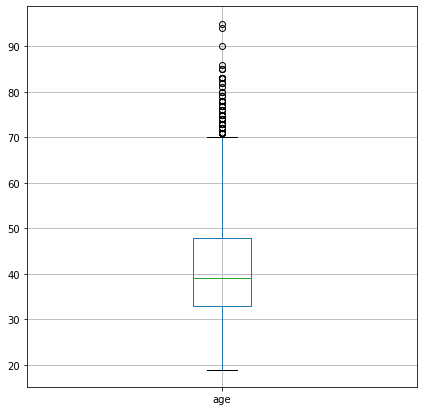

In [ ]:
data.boxplot(column=['age'],figsize=(7,7))
plt.show()

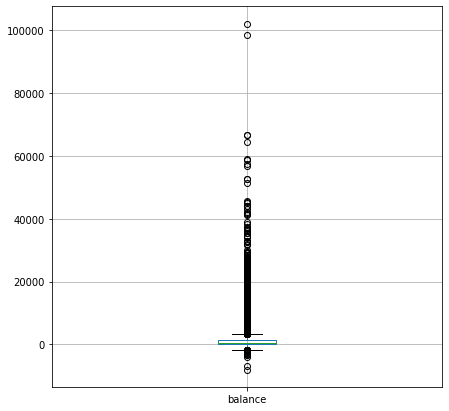

In [ ]:
data.boxplot(column=['balance'],figsize=(7,7))
plt.show()

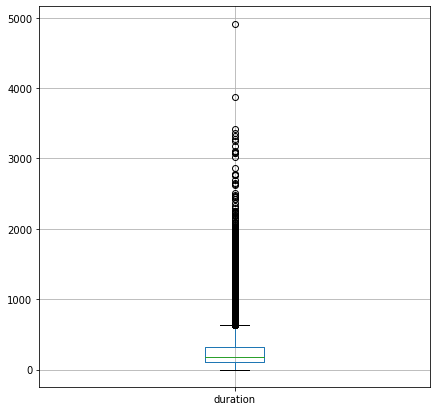

In [ ]:
data.boxplot(column=['duration'],figsize=(7,7))
plt.show()

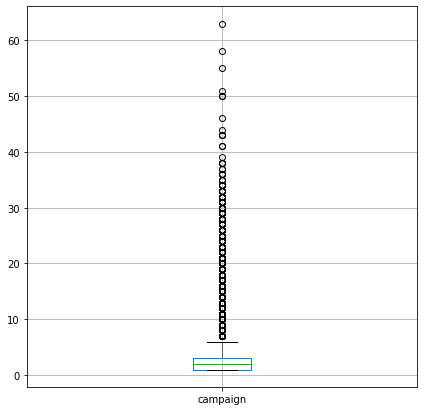

In [ ]:
data.boxplot(column=['campaign'],figsize=(7,7))
plt.show()

- Datamızın numeric degerlere sahip sütunlarının arasındaki korelasyonlarına bakacağız

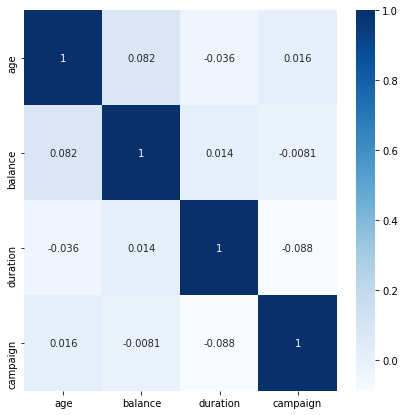

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(data.corr(),annot=True,cmap='Blues')
plt.show()

- Yukarıda görmüş olduğumuz ısı haritasında balance ve age ,campaign ve balance, campaign ve duration aralarında yüksek korelasyona sahiptir

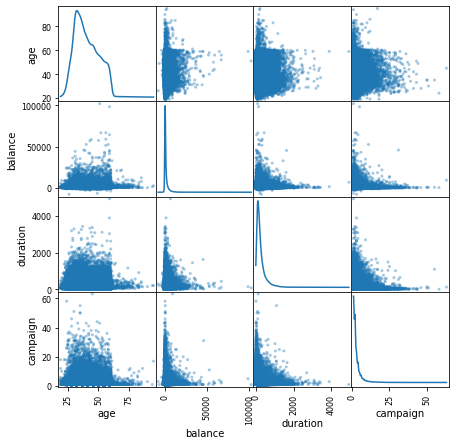

In [ ]:
pd.plotting.scatter_matrix(data,alpha=0.4,diagonal='kde',figsize=(7,7))
plt.show()

#Kategorik Verilerin,Numeric Veriye Dönüşümü

- Datamızın kategorik verilerini numeric hale getiriyoruz
- One Hot Encoder yapıyoruz

In [ ]:
data = pd.get_dummies(data,columns=['marital','housing','loan','job','education','contact','campaign'],
                      prefix=['marital','housing','loan','job','education','contact','campaign'])

- Aşağıda gördüğünüz gibi kategorik verilerimizin one hot encoder yapılmış hali

In [ ]:
data

,age,balance,duration,y,marital_divorced,marital_married,marital_single,housing_no,housing_yes,loan_no,loan_yes,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone,campaign_1,campaign_2,campaign_3,campaign_4,campaign_5,campaign_6,campaign_7,campaign_8,campaign_9,campaign_10,campaign_11,campaign_12,campaign_13,campaign_14,campaign_15,campaign_16,campaign_17,campaign_18,campaign_19,campaign_20,campaign_21,campaign_22,campaign_23,campaign_24,campaign_25,campaign_26,campaign_27,campaign_28,campaign_29,campaign_30,campaign_31,campaign_32,campaign_33,campaign_34,campaign_35,campaign_36,campaign_37,campaign_38,campaign_39,campaign_41,campaign_43,campaign_44,campaign_46,campaign_50,campaign_51,campaign_55,campaign_58,campaign_63
0,58,2143,261,no,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,44,29,151,no,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,33,2,76,no,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,47,1506,92,no,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,33,1,198,no,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,395,107,no,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39996,30,3340,238,yes,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39997,54,200,170,yes,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39998,34,1047,342,no,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


- One Hot Encoder yapılmıs şeklinde yeni datamızın boyutu

In [ ]:
data.shape

(40000, 75)

#Bağımlı Değişken

- Bağımlı değişkenimiz olan y sütununu datamızdan alıyoruz

In [ ]:
y = data.iloc[:,3:4]

In [ ]:
y

,y
0,no
1,no
2,no
3,no
4,no
...,...
39995,no
39996,yes
39997,yes
39998,no


- Bağımlı değişkenimiz olan y sütununu LabelEncoder ile numeric hale getiriyoruz
- yes = 1 , no = 0 oluyor 

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()

y = label_enc.fit_transform(y)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print("Label Encoder yapılmıs y datamız =" + str(y))

print("y datamızın sayısı =" + str(len(y)))

Label Encoder yapılmıs y datamız =[0 0 0 ... 1 0 0]
y datamızın sayısı =40000


- Bağımlı değişkenimiz olan y sütununu datamızdan siliyoruz

- y sütununun olmadığı yeni datamız da bizim bağımsız değişkenimiz olacaktır

In [ ]:
data = data.drop('y',axis=1)

In [ ]:
data

,age,balance,duration,marital_divorced,marital_married,marital_single,housing_no,housing_yes,loan_no,loan_yes,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone,campaign_1,campaign_2,campaign_3,campaign_4,campaign_5,campaign_6,campaign_7,campaign_8,campaign_9,campaign_10,campaign_11,campaign_12,campaign_13,campaign_14,campaign_15,campaign_16,campaign_17,campaign_18,campaign_19,campaign_20,campaign_21,campaign_22,campaign_23,campaign_24,campaign_25,campaign_26,campaign_27,campaign_28,campaign_29,campaign_30,campaign_31,campaign_32,campaign_33,campaign_34,campaign_35,campaign_36,campaign_37,campaign_38,campaign_39,campaign_41,campaign_43,campaign_44,campaign_46,campaign_50,campaign_51,campaign_55,campaign_58,campaign_63
0,58,2143,261,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,44,29,151,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,33,2,76,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,47,1506,92,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,33,1,198,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,395,107,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39996,30,3340,238,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39997,54,200,170,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39998,34,1047,342,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#Datamızın Train ve Test Datalarına Ayrılması

- Bağımlı değişkenimizi ve bağımsız değişkenimizi kullanarak verimizi train ve test datalarına ayırıyoruz


In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(data,y, test_size = 0.33 ,random_state = 18)


In [ ]:
print("x_train shape : " + str(x_train.shape))
print("x_test shape  : " + str(x_test.shape))
print("y_train shape : " + str(y_train.shape))
print("y_test shape  : " + str(y_test.shape))

x_train shape : (26800, 74)
x_test shape  : (13200, 74)
y_train shape : (26800,)
y_test shape  : (13200,)


In [ ]:
from sklearn.preprocessing import StandardScaler

sta_scaler = StandardScaler()


- x_train ve x_test verilerimizi StandardScaler kullanarak Standartlaştırma yapıyoruz
- Standartlaştırma yaparak farklı ölçeklerdeki değişkenlerin aynı ölçeğe indirgeyerek karşılaştırılabilmesini sağlar

In [ ]:
x_train = sta_scaler.fit_transform(x_train)
x_test = sta_scaler.fit_transform(x_test)

In [ ]:
x_train

array([[ 1.81657545e+00, -4.36787886e-01, -3.74073467e-01, ...,
         0.00000000e+00,  0.00000000e+00, -6.10858619e-03],
       [-3.65497163e-01, -3.01796493e-01,  2.34286112e-01, ...,
         0.00000000e+00,  0.00000000e+00, -6.10858619e-03],
       [ 3.61860375e-01, -8.04106078e-02,  6.98327519e+00, ...,
         0.00000000e+00,  0.00000000e+00, -6.10858619e-03],
       ...,
       [ 1.71266723e+00, -4.12489435e-01, -3.70271219e-01, ...,
         0.00000000e+00,  0.00000000e+00, -6.10858619e-03],
       [-7.81130042e-01, -4.37800322e-01, -5.10954372e-01, ...,
         0.00000000e+00,  0.00000000e+00, -6.10858619e-03],
       [ 2.12830011e+00, -4.37800322e-01, -6.89659998e-01, ...,
         0.00000000e+00,  0.00000000e+00, -6.10858619e-03]])

In [ ]:
x_test

array([[ 3.51372657e-01, -2.40983551e-01,  9.26743796e-01, ...,
        -8.70421251e-03, -8.70421251e-03,  0.00000000e+00],
       [-1.40529492e+00, -1.42372940e-01,  3.34965328e-01, ...,
        -8.70421251e-03, -8.70421251e-03,  0.00000000e+00],
       [-2.68627664e-01,  1.66774922e-01,  5.29769303e-02, ...,
        -8.70421251e-03, -8.70421251e-03,  0.00000000e+00],
       ...,
       [ 1.59137330e+00,  1.58415514e-03, -8.24761602e-01, ...,
        -8.70421251e-03, -8.70421251e-03,  0.00000000e+00],
       [-3.71961051e-01, -3.50750836e-01, -4.23623178e-01, ...,
        -8.70421251e-03, -8.70421251e-03,  0.00000000e+00],
       [ 5.58039430e-01, -2.08593204e-01, -7.65186589e-01, ...,
        -8.70421251e-03, -8.70421251e-03,  0.00000000e+00]])

#Train için Model Oluşturma

- İlk olarak logistic Regression algoritmasını kullanacağız

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

- Modelimizi Train ediyoruz

In [ ]:
log_reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

- Modelimizi predict ile x_test datamızı kullanarak tahmin verileri oluşturuyoruz

In [ ]:
y_pred = log_reg.predict(x_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
for i in range(10):
  print(y_pred[i])

0
0
0
0
0
0
0
0
0
0


- Confusion matrix ile model sonuçlarımıza bakıyoruz

In [ ]:
from sklearn.metrics import confusion_matrix

c_matrix = confusion_matrix(y_test,y_pred)

- Aşşağıda göreceğimiz gibi ;

- True Positive = 12108
- True Negative  = 167
- False Negative = 707
- True Negative = 218

In [ ]:
c_matrix

array([[12108,   167],
       [  707,   218]])

- Confusion matrix verilerimiz ile ısı haritası oluşturduk

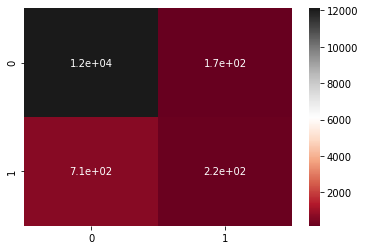

In [ ]:
sns.heatmap(c_matrix,annot=True,cmap='RdGy')

- Classification Report ile bazı değerlerimize bakıyoruz

In [ ]:
from sklearn.metrics import classification_report

c_report = classification_report(y_test,y_pred)

In [ ]:
print(c_report)

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     12275
           1       0.57      0.24      0.33       925

    accuracy                           0.93     13200
   macro avg       0.76      0.61      0.65     13200
weighted avg       0.92      0.93      0.92     13200



- k-fold Cross Validation ile modelimizinin skoruna bakıyoruz
- Biz cv=5 dediğimiz için 5 katlamalı bir cross validation yapacak
- Bu yüzden 5 tane Score çıktısı alacağız

In [ ]:
from sklearn.model_selection import cross_val_score

cross = cross_val_score(log_reg,x_train,y_train,cv=5)

- Aşağıda gördüğümüz gibi cross validation ile modelimizin skorları

In [ ]:
print(cross)

[0.93302239 0.93134328 0.93208955 0.93320896 0.92891791]


- Cross validation ile modelimizin ortalaması ve Standart Sapmasını hesapladık

In [ ]:
print("Ortalaması = " +str(cross.mean()))

print("Standart Sapması = " +str(cross.std()))

Ortalaması = 0.9317164179104477
Standart Sapması = 0.0015519876375436966


- Tensorflow kullanarak Sinir Ağı modeli oluşturduk
- 128 units'den oluşan 2 Dense layer 
- 64 ve 32 units'den oluşan 2 Dense layer
- 0.25 oranla sinir ağı katmanlarımızı silecek olan Dropout kullandık.Bu şekilde Overfitting'i(Aşırı Uyum) engellemeye çalıştık
- Activation Fonksiyonu olarak Relu kullandık Output Layerımızda ise Sigmoid aktvasyon fonksiyonunu kullandık
- Çünkü bizim modelimiz çıktı olarak 0 veya 1 değerler yani probabilistik değerler döndürecektir

In [ ]:
import tensorflow as tf

def Train():

  model = tf.keras.models.Sequential([tf.keras.layers.Dense(128,activation = 'relu',input_dim=74),
                                      tf.keras.layers.Dense(128,activation='relu'),
                                      tf.keras.layers.Dropout(0.25),
                                      tf.keras.layers.Dense(64,activation='relu'),
                                      tf.keras.layers.Dropout(0.25),
                                      tf.keras.layers.Dense(32,activation='relu'),
                                      tf.keras.layers.Dense(1,activation='sigmoid')])
  
  model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

  return model

- k-fold Cross Validation kullanacağımız için KerasClassifier kullanıyoruz
- Aslında içinde sinir ağımız olan Train fonksiyonumuzu burada fit etmiş oluyoruz aslında
- Bunu da sınır_model değerine eşitliyoruz.Bu değeri cross_validation da kullanacağız estimator olarak 

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier

sınır_model = KerasClassifier(build_fn=Train,epochs=10,verbose=1)

- Sinir ağı modelimizin cross validation ile sonuçlarına bakacağız.
- Cv=5 diyerek veri kümemizi 5 kümeye bölecek.Her defasında bir küme test kümesi 4 veri kümesi ise eğitim veri kümesi olarak kullanılacak.
- Bu işlem 5 kez tekrarlanacak
- Biz epochs = 10 demiştik . 5 kez 10 epochs tekrar edecek

In [ ]:
cross_val = cross_val_score(estimator=sınır_model , X = x_train ,y = y_train,cv=5)

Epoch 1/10
670/670 [==============================] - 1s 2ms/step - loss: 0.2051 - accuracy: 0.9277
Epoch 2/10
670/670 [==============================] - 1s 2ms/step - loss: 0.1819 - accuracy: 0.9309
Epoch 3/10
670/670 [==============================] - 1s 2ms/step - loss: 0.1775 - accuracy: 0.9317
Epoch 4/10
670/670 [==============================] - 1s 2ms/step - loss: 0.1747 - accuracy: 0.9318
Epoch 5/10
670/670 [==============================] - 1s 2ms/step - loss: 0.1725 - accuracy: 0.9325
Epoch 6/10
670/670 [==============================] - 2s 2ms/step - loss: 0.1710 - accuracy: 0.9333
Epoch 7/10
670/670 [==============================] - 1s 2ms/step - loss: 0.1691 - accuracy: 0.9333
Epoch 8/10
670/670 [==============================] - 1s 2ms/step - loss: 0.1674 - accuracy: 0.9355
Epoch 9/10
670/670 [==============================] - 1s 2ms/step - loss: 0.1666 - accuracy: 0.9363
Epoch 10/10
168/168 [==============================] - 0s 2ms/step - loss: 0.1770 - accuracy: 0.9325

- Sinir ağı modelimizin cross validation sonuçlarını aşağıda görebiliyoruz
-Yani bize 5 tane accuracy skoru çıktısı verdi.Çünkü biz 5 katlamalaı cross validation yaptık

In [ ]:
print(cross_val)

[0.93246269 0.92779851 0.92294776 0.93041044 0.93041044]


- Sinir ağı modelimiz ile x_test veri kümesini kullanarak predict yapıyoruz.
- Tahmin veri kümesi oluşturduk.
- model.predict(x_test) şeklinde bir sonuç almak isteseydik bizim tahmin veri kümemiz de 0 ile 1 arasında değerler döndürecekti.Örneğin ;
y_pred[0] = 0.55
y_pred[1] = 0.85 gibi değerler döndürecekti.Ama bizim 0 ya da 1 olan tahmin veri kümesine ihtiyacımız var.Aynı zaman da biz bu tahmin veri kümesini y_test veri kümemiz ile karşılaştırıp modelimizi test edemeyecektik 
- O yüzden np.round kullanarak tahmin veri kümemizi 0 ve 1'lerden oluşan bir veri kümesine dönüştürüyoruz.

In [ ]:
model = Train()

y_pred_sınır = np.round(model.predict(x_test),0)

- Confusion matrix ile sinir ağı ile predict yaptığımız veri kümemizi y_test veri kümemiz ile karşılatırıyoruz

In [ ]:
conf_sınır = confusion_matrix(y_test , y_pred_sınır)

- Aşağıda göreceğimiz gibi ;

- True Positive = 8905

- True Negative = 3370

- False Negative = 741

- True Negative = 184

In [ ]:
print(conf_sınır)

[[8905 3370]
 [ 741  184]]


- Isı haritasını kullanarak confusion matrix oluşturuyoruz

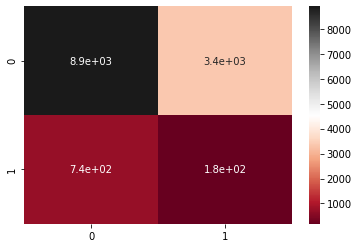

In [ ]:
sns.heatmap(conf_sınır,annot=True,cmap='RdGy')

In [ ]:
c_report_sınır = classification_report(y_test,y_pred_sınır)

- Classification report kullanarak sinir ağı modelimizin bazı sonuçlarına bakıyoruz.

In [ ]:
print(c_report_sınır)

              precision    recall  f1-score   support

           0       0.92      0.73      0.81     12275
           1       0.05      0.20      0.08       925

    accuracy                           0.69     13200
   macro avg       0.49      0.46      0.45     13200
weighted avg       0.86      0.69      0.76     13200

